### Import the features

In [1]:
import pandas as pd
data = pd.read_csv('labeled_spectral_features.csv') #Read digit 0 data
data.sample(10) #Check the dataframe 
#(3000 x 5), 3000 digits with a label + 4 features


,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,Spectral_Flatness,Label
2363,1299.065789,1068.415353,2729.166667,0.085447,7
1422,941.229389,695.367268,1519.531250,0.061127,4
963,739.813568,841.952390,1519.270833,0.004471,3
1025,1456.468189,1093.097251,2740.767045,0.115178,3
1068,1421.101958,1227.815966,2937.500000,0.080932,3
2053,1627.118271,1133.305848,2960.156250,0.191873,6
2341,1322.972938,1014.253348,2433.593750,0.087142,7
1393,1022.082767,981.839030,2037.860577,0.038006,4
2389,1145.123189,1036.894887,2543.750000,0.074221,7
2766,656.185101,676.264493,1197.656250,0.006443,9


### Split the data into 70/30 training/testing, and normalize

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

trainset, testset, train_labels, test_labels = train_test_split(data.iloc[:, :4], data["Label"], test_size=0.30, random_state=42) #Create the training and testing sets. 70/30 split

print(trainset)
#(2100 x 4), as in 2100 digits each with 4 features. 2100 being 70% of the original 3000 digits
print(testset)
#(900 x 4)

scaler = StandardScaler()
trainset=scaler.fit_transform(trainset)
testset=scaler.fit_transform(testset)


      Spectral_Centroid  Spectral_Bandwidth  Spectral_Rolloff  \
611          774.153851          829.695242       1485.576923   
530          849.398953          769.903472       1373.263889   
2787         892.189212          963.297848       1996.710526   
49          1161.944628          982.939317       2255.208333   
1883        1704.620115         1150.937156       3073.660714   
...                 ...                 ...               ...   
1638        1332.723929          889.791978       2305.121528   
1095        1322.971821         1203.549454       2929.687500   
1130         959.045797         1007.717000       2241.406250   
1294         737.460564          680.056291       1186.035156   
860         1012.820719          910.392396       2011.718750   

      Spectral_Flatness  
611            0.010620  
530            0.023599  
2787           0.013164  
49             0.008544  
1883           0.129324  
...                 ...  
1638           0.158413  
1095       

### Create MLP and train it

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = MLPClassifier(
                      hidden_layer_sizes=(128,64,32,16), #Architecture is 4 hidden layers as follows: 4 input x 128x64x32x16 hidden layers x 10 outputs
                      activation='relu', #Relu for hidden layers activation function
                      solver='sgd', #Stochastic gradient descent
                      alpha=0.001, #Lambda in class, the strength of L2 regularization
                      learning_rate='adaptive', #Learning rate is divided by 5 if two consecutive epochs fail to decrease training loss by at least the tolerance (defined belowe)
                      learning_rate_init=0.03, #Initial learning rate
                      tol= 0.00001, #Tolerance for adaptive learning condition
                      momentum=0.9, #Momentum for gradient descent
                      random_state=12,  #Seed for reproducability
                      max_iter=10000, #Number of epochs
                      shuffle=True, #Shuffle samples in each new epoch
                      verbose=True,
                      n_iter_no_change=10, #Stop training after this many epochs without improvements of at least tol in the loss
                      ).fit(trainset, train_labels)



Iteration 1, loss = 2.32164257
Iteration 2, loss = 2.26334253
Iteration 3, loss = 2.19292677
Iteration 4, loss = 2.08579938
Iteration 5, loss = 1.94378082
Iteration 6, loss = 1.83075334
Iteration 7, loss = 1.77515466
Iteration 8, loss = 1.73801048
Iteration 9, loss = 1.70968695
Iteration 10, loss = 1.68773105
Iteration 11, loss = 1.65912434
Iteration 12, loss = 1.64292543
Iteration 13, loss = 1.62088044
Iteration 14, loss = 1.60072222
Iteration 15, loss = 1.58042760
Iteration 16, loss = 1.56002024
Iteration 17, loss = 1.53429996
Iteration 18, loss = 1.50965262
Iteration 19, loss = 1.49093275
Iteration 20, loss = 1.47250226
Iteration 21, loss = 1.45495345
Iteration 22, loss = 1.43041165
Iteration 23, loss = 1.42941727
Iteration 24, loss = 1.41014426
Iteration 25, loss = 1.40366577
Iteration 26, loss = 1.40203303
Iteration 27, loss = 1.37275761
Iteration 28, loss = 1.37283542
Iteration 29, loss = 1.34763909
Iteration 30, loss = 1.33405902
Iteration 31, loss = 1.34224964
Iteration 32, los

### Test the MLP

Accuracy is  0.5733333333333334
Precision is  0.5779
Recall is  0.5773
F1 score is  0.5755


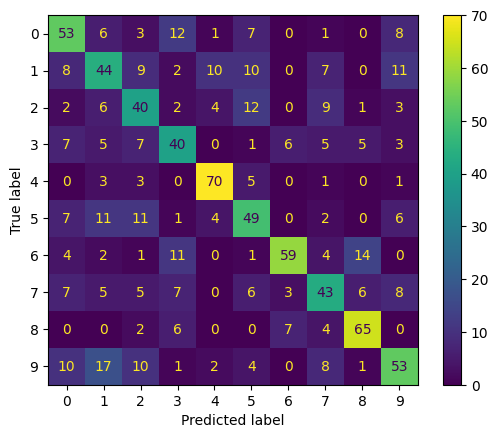

In [11]:
import torch as torch
from torcheval.metrics.functional import multiclass_f1_score, multiclass_recall, multiclass_precision
true_labels_tensor = torch.tensor(test_labels.values)
pred_labels_tensor = torch.tensor(model.predict(testset))
acc = model.score(testset,test_labels)
prec = round(multiclass_precision(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
recall = round(multiclass_recall(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
f1 = round(multiclass_f1_score(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
print("Accuracy is ", acc)
print("Precision is ", prec)
print("Recall is ", recall)
print("F1 score is ", f1)
cm = confusion_matrix(model.predict(testset), test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()